In [1]:
# test the fitting: Deviance

In [3]:
import pickle
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from optimization_utils import param_vec_to_dict, make_boundary

In [4]:
folder = "0823_Deviance_50_100/"

In [5]:
file_list = glob.glob(folder + "outfiles/*data*.pkl")
file_list = [i.replace(folder + "outfiles/","") for i in file_list]
file_list = [i.replace(".pkl","") for i in file_list]
file_list = [tuple(map(int,i.split("data"))) for i in file_list]
file_list.sort()
# file_list

In [6]:
pso_df = pd.DataFrame(columns = ['iter','particle','err'])
_, _, what_to_fit = make_boundary()

for iter, p in file_list:
    path = folder + "outfiles/" + str(iter) + "data" + str(p) + ".pkl" 
    with open(path, 'rb') as inp:
        data = pickle.load(inp)
    if len(data) != 0:
        err = data['err']
        params = data['params']
        row_dict = {"iter":iter,"particle":p,"err":err}
        row_dict.update({what_to_fit[i]:params[i] for i in range(len(params))})
        pso_df = pso_df.append(row_dict,ignore_index=True)
    
pso_df

,iter,particle,err,beta_enc,beta_rec,beta_rec_post,c_thresh,gamma_fc,s_fc
0,1.0,0.0,0.532926,0.321513,0.078506,0.876371,0.225627,0.448958,0.785341
1,1.0,1.0,0.529142,0.360972,0.072728,0.132456,0.735115,0.480880,0.397804
2,1.0,2.0,0.532926,0.276406,0.228158,0.210081,0.113985,0.238916,0.858992
3,1.0,3.0,0.531637,0.714397,0.499914,0.072766,0.802337,0.297856,0.836570
4,1.0,4.0,0.532926,0.849467,0.890962,0.660549,0.038634,0.567855,0.483919
...,...,...,...,...,...,...,...,...,...
1174,50.0,86.0,0.530284,0.196507,0.471008,0.237322,0.313915,0.953592,0.289712
1175,50.0,90.0,0.292239,0.284950,0.286035,0.230014,0.815802,0.798002,0.193699
1176,50.0,92.0,0.531637,0.369326,0.388574,0.518384,0.482087,0.738466,0.772237
1177,50.0,93.0,0.531637,0.208673,0.083135,0.055013,0.214812,0.954712,0.793734


In [7]:
pso_df.loc[pso_df.iter == 50]

,iter,particle,err,beta_enc,beta_rec,beta_rec_post,c_thresh,gamma_fc,s_fc
1167,50.0,11.0,0.465615,0.118076,0.114195,0.342116,0.885679,0.753251,0.328886
1168,50.0,35.0,0.292083,0.162584,0.795649,0.170166,0.375317,0.712229,0.041663
1169,50.0,47.0,0.455457,0.405471,0.599079,0.084757,0.959102,0.433986,0.250717
1170,50.0,51.0,0.400485,0.243670,0.595536,0.182042,0.581431,0.248303,0.135559
1171,50.0,60.0,0.398348,0.182307,0.461115,0.713958,0.476787,0.869547,0.360955
1172,50.0,69.0,0.532926,0.326250,0.484115,0.291825,0.222176,0.762969,0.445416
1173,50.0,80.0,0.465615,0.252031,0.451483,0.988295,0.350846,0.864467,0.143567
1174,50.0,86.0,0.530284,0.196507,0.471008,0.237322,0.313915,0.953592,0.289712
1175,50.0,90.0,0.292239,0.284950,0.286035,0.230014,0.815802,0.798002,0.193699
1176,50.0,92.0,0.531637,0.369326,0.388574,0.518384,0.482087,0.738466,0.772237


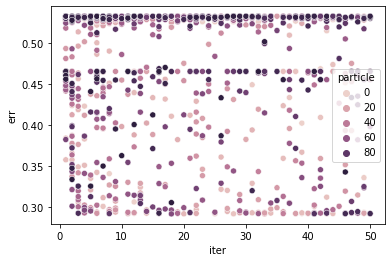

In [8]:
sns.scatterplot(data=pso_df, x="iter", y="err", hue="particle")
plt.show()

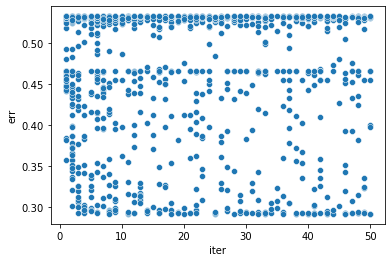

In [9]:
sns.scatterplot(data=pso_df, x="iter", y="err")
plt.show()

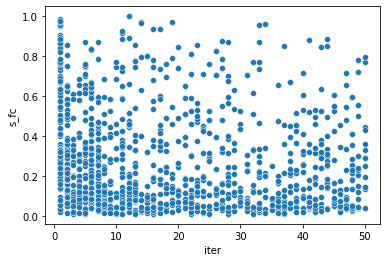

In [10]:
sns.scatterplot(data=pso_df, x="iter", y="s_fc")
plt.show()

In [8]:
param_vec = np.loadtxt('/home1/beigejin/MyCMR2/Modeling/CMR2/fitting/' + folder + 'outfiles/xoptb.txt')
prams = param_vec_to_dict(param_vec)
prams

{'beta_enc': 0.192556,
 'beta_rec': 0.479854,
 'beta_rec_post': 0.082478,
 'beta_distract': None,
 'phi_s': 2,
 'phi_d': 0.5,
 's_cf': 0,
 's_fc': 0.04089,
 'kappa': 0.5,
 'eta': 0.5,
 'omega': 8,
 'alpha': 4,
 'c_thresh': 0.312308,
 'lamb': 0.5,
 'rec_time_limit': 60000.0,
 'dt': 10,
 'nitems_in_accumulator': 50,
 'max_recalls': 50,
 'learn_while_retrieving': False,
 'gamma_fc': 0.861338,
 'gamma_cf': 0.5}

### Run CMR2 on the Best Params

In [12]:
import CMR2_jbg as cmr
pd.set_option('display.max_columns', None)
np.set_printoptions(edgeitems=20, linewidth=200,precision=4)

In [13]:
rng = np.random.default_rng(seed=42)

In [19]:
# import recognition dataframe
with open("/home1/beigejin/Recog_David/data_als/data_df_clean.pkl", 'rb') as inp:
    df = pickle.load(inp)
df

,rt,subject_ID,item,lag,category,confidence,category_label,position,old,yes,curr_cat_length,curr_cat_label_length,itemno,session
57307,1514.875,0,CHICKEN,0,Uncategorized,1.0,FarmAnimals,0,False,0,NaN,0,53,0
57766,853.505,0,BLUEBERRY,0,Uncategorized,1.0,Fruit,1,False,0,NaN,0,26,0
58224,731.040,0,BUS,0,Uncategorized,1.0,Vehicles,2,False,0,NaN,0,33,0
58695,848.955,0,LEMON,0,Uncategorized,1.0,Fruit,3,False,0,NaN,1,151,0
59159,643.880,0,OYSTER,0,Uncategorized,1.0,OceanAnimals,4,False,0,NaN,0,187,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337333,1911.000,656,COLA,37,Beverages,2.0,Beverages,575,True,0,18.0,18,60,547
337508,2358.000,656,BASEBALL,115,Toys,8.0,Toys,576,True,1,23.0,23,10,547
337682,1239.000,656,TEA,24,Beverages,8.0,Beverages,577,True,1,19.0,19,265,547
337870,1567.000,656,RADIO,41,Uncategorized-Singleton,2.0,Electronics,578,True,0,NaN,23,213,547


In [20]:
s_mat = np.load('/home1/beigejin/Recog_David/data_als/semantic_mat_fasttext.npy')

In [21]:
df_simu = cmr.run_continuous_recog_multi_sess(prams,df,s_mat)
df_simu

CMR Time: 237.32299995422363


,session,position,itemno,s_resp,s_rt,csim
57307,0,0,53,0.0,0.0,0.000000
57766,0,1,26,0.0,0.0,0.019360
58224,0,2,33,0.0,0.0,0.029739
58695,0,3,151,0.0,0.0,0.052976
59159,0,4,187,0.0,0.0,0.063780
...,...,...,...,...,...,...
337333,547,575,60,1.0,0.0,0.899969
337508,547,576,10,1.0,0.0,0.927275
337682,547,577,265,1.0,0.0,0.959264
337870,547,578,213,1.0,0.0,0.924122


In [22]:
df_new = df_simu.merge(df,on=['session','position','itemno'])
df_new

,session,position,itemno,s_resp,s_rt,csim,rt,subject_ID,item,lag,category,confidence,category_label,old,yes,curr_cat_length,curr_cat_label_length
0,0,0,53,0.0,0.0,0.000000,1514.875,0,CHICKEN,0,Uncategorized,1.0,FarmAnimals,False,0,NaN,0
1,0,1,26,0.0,0.0,0.019360,853.505,0,BLUEBERRY,0,Uncategorized,1.0,Fruit,False,0,NaN,0
2,0,2,33,0.0,0.0,0.029739,731.040,0,BUS,0,Uncategorized,1.0,Vehicles,False,0,NaN,0
3,0,3,151,0.0,0.0,0.052976,848.955,0,LEMON,0,Uncategorized,1.0,Fruit,False,0,NaN,1
4,0,4,187,0.0,0.0,0.063780,643.880,0,OYSTER,0,Uncategorized,1.0,OceanAnimals,False,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317835,547,575,60,1.0,0.0,0.899969,1911.000,656,COLA,37,Beverages,2.0,Beverages,True,0,18.0,18
317836,547,576,10,1.0,0.0,0.927275,2358.000,656,BASEBALL,115,Toys,8.0,Toys,True,1,23.0,23
317837,547,577,265,1.0,0.0,0.959264,1239.000,656,TEA,24,Beverages,8.0,Beverages,True,1,19.0,19
317838,547,578,213,1.0,0.0,0.924122,1567.000,656,RADIO,41,Uncategorized-Singleton,2.0,Electronics,True,0,NaN,23


In [5]:
f = folder.rstrip("/")

In [24]:
with open('/home1/beigejin/Recog_David/data_als/data_df_simu_' + f + '.pkl', 'wb') as outp:
    pickle.dump(df_new, outp, pickle.HIGHEST_PROTOCOL)

In [6]:
with open("/home1/beigejin/Recog_David/data_als/data_df_simu_" + f + ".pkl", 'rb') as inp:
    df_new = pickle.load(inp)

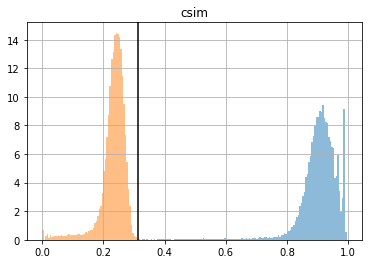

In [9]:
bin_arr = np.arange(0,1,0.005)
df_tar = df_new.loc[df_new.old == True]
df_lure = df_new.loc[df_new.old == False]

fig, ax = plt.subplots()
df_tar.hist(column = 'csim', bins=bin_arr, ax = ax, density = True,alpha=0.5)
df_lure.hist(column = 'csim', bins=bin_arr, ax = ax, density = True, alpha=0.5)
plt.axvline(prams["c_thresh"], color = 'k')
plt.show()